# EDA of the Query->Document_type classification dataset

In [15]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid", font="sans-serif")

from wordcloud import WordCloud, STOPWORDS

## Load original dataset

In [16]:
filepath = '/raid/antoloui/Master-thesis/_data/classification/cam_query_to_doctype.csv'
original_df = pd.read_csv(filepath, delimiter=',', index_col=0)

# Rename columns.
original_df.columns = ['Query', 'Class']
classes = original_df.Class.unique()

# Print details.
print('Number of queries: {}\n'.format(original_df.shape[0]))
print('Number of doc types: {:,}'.format(len(classes)))
for i, cat in enumerate(classes):
    print("  {}".format(cat))
    
# Check for duplicated queries.
#print("\nNumber of duplicated rows: {}. Only keeping one sample for each duplicate...".format(original_df[original_df.duplicated()].shape[0]))
#original_df.drop_duplicates(subset=['Query', 'Class'], keep='first', inplace=True)
#print("Number of duplicated queries with different classes: {}. Remove them...".format(original_df[original_df.duplicated(['Query'])].shape[0]))
#original_df.drop_duplicates(subset=['Query'], keep=False, inplace=True)
#original_df.reset_index(drop=True, inplace=True)
#print("Final number of queries: {}".format(original_df.shape[0]))

Number of queries: 55900

Number of doc types: 20
  Install & Upgrade Guides
  Configuration (Guides, Examples & TechNotes)
  Data Sheets
  Release Notes
  Maintain & Operate (Guides & TechNotes)
  End User Guides
  White Papers
  Q&A
  Technical References
  Design (Guides & TechNotes)
  Sales Resources
  Command References
  Compatibility Information
  Main Pages
  Product Literature
  Troubleshooting (Guides & TechNotes)
  Programming Guides
  Feature Guides
  License & Warranty
  End-of-Life & End-of-Sale Notices


### Only keep the classes of interest

In [17]:
classes_interest = ['Command References',
                    'Data Sheets',
                    'Configuration (Guides, Examples & TechNotes)',
                    'Install & Upgrade Guides',
                    'Release Notes',
                    'Maintain & Operate (Guides & TechNotes)',
                    'End User Guides']
original_df = original_df[original_df.Class.isin(classes_interest)]

# Drop NaN.
original_df = original_df.dropna()

# Deal with duplicates.
original_df.drop_duplicates(subset=['Query', 'Class'], keep='first', inplace=True)  # For duplicated queries with same class, keep first instance.
original_df.drop_duplicates(subset=['Query'], keep=False, inplace=True)  # For duplicated queries with different classes, remove them.
original_df.reset_index(drop=True, inplace=True)

# Rename long class names.
original_df = original_df.replace({'Class': {'Configuration (Guides, Examples & TechNotes)': 'Configuration', 
                                   'Maintain & Operate (Guides & TechNotes)': 'Maintain & Operate'}
                                 })

# Print details.
print('Number of training queries: {}\n'.format(original_df.shape[0]))
print('Number of remaining doc types: {:,}'.format(len(original_df.Class.unique())))
for i, cat in enumerate(original_df.Class.unique()):
    print("  {}".format(cat))

original_df

Number of training queries: 48500

Number of remaining doc types: 7
  Install & Upgrade Guides
  Configuration
  Data Sheets
  Release Notes
  Maintain & Operate
  End User Guides
  Command References


,Query,Class
0,UCS: Virtual drive system mismatch. Reason: S...,Install & Upgrade Guides
1,15.2(6)E2 2960X MIB,Configuration
2,3650 sfp installation video,Install & Upgrade Guides
3,3850 SWITCH CONNECTOR PLUG,Data Sheets
4,3850 wan macsec,Configuration
...,...,...
48495,wlc test dfs command aireos,Configuration
48496,WLC Tie break AP,Configuration
48497,wsa external dlp policies,End User Guides
48498,XE 3.5 PBR 4500X,Configuration


### Plot document type repartition

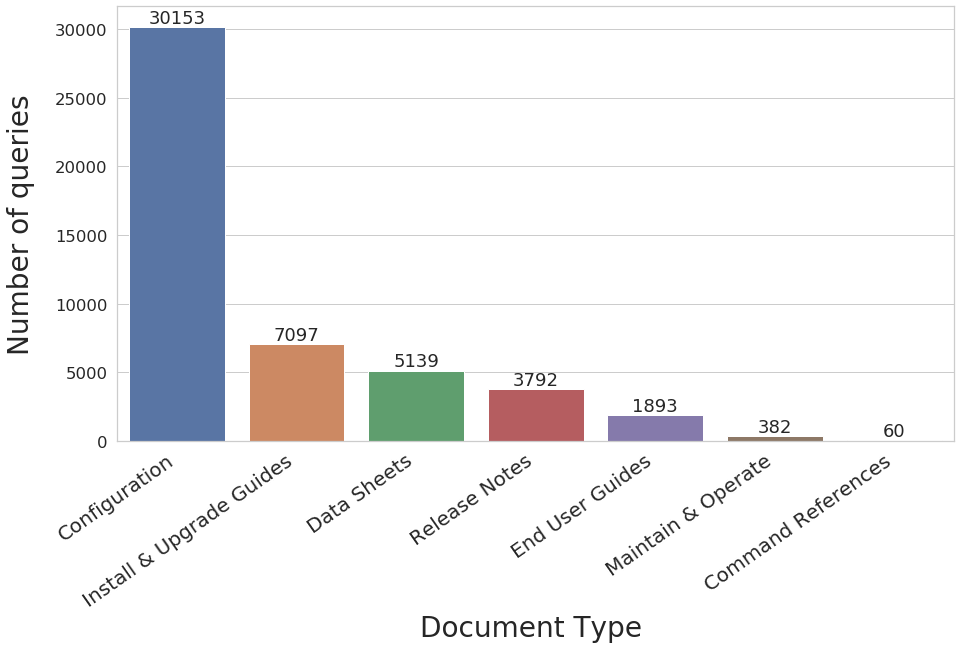

In [18]:
def plot_repartition(df, fig_name):
    """
    """
    # Get the counts of each document type.
    count = df['Class'].value_counts()
    count_classes = count.index.tolist()
    count_values = count.values.tolist()

    # Create barplot.
    plt.figure(figsize=(15,8))
    ax = sns.barplot(count_classes, count_values)

    # Rotate labels on x-axis.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment='right', fontsize=20)

    # Set titles of plot and axes.
    #plt.title("Queries for each document type", fontsize=24)
    plt.ylabel('Number of queries', fontsize=28, labelpad=20)
    plt.xlabel('Document Type ', fontsize=28)

    #adding the count labels above rectangles.
    rects = ax.patches
    count_values = [30153,7097,5139,3792,1893,382,60] # Temporary
    for rect, label in zip(rects, count_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

    # Show the plot.
    output = "./figures/" + fig_name + ".pdf"
    plt.savefig(output, bbox_inches='tight')
    plt.show()
    return

plot_repartition(original_df, "classification_original_doctype_repartition")

## Load synthetic dataset

Number of training queries: 52757

Number of doc types: 6
  Configuration (Guides, Examples & TechNotes)
  Install & Upgrade Guides
  Maintain & Operate (Guides & TechNotes)
  Release Notes
  Data Sheets
  End User Guides

Number of duplicated rows: 2010. Only keeping one sample for each duplicate...
Number of duplicated queries with different classes: 21. Remove them...
Final number of queries: 50705


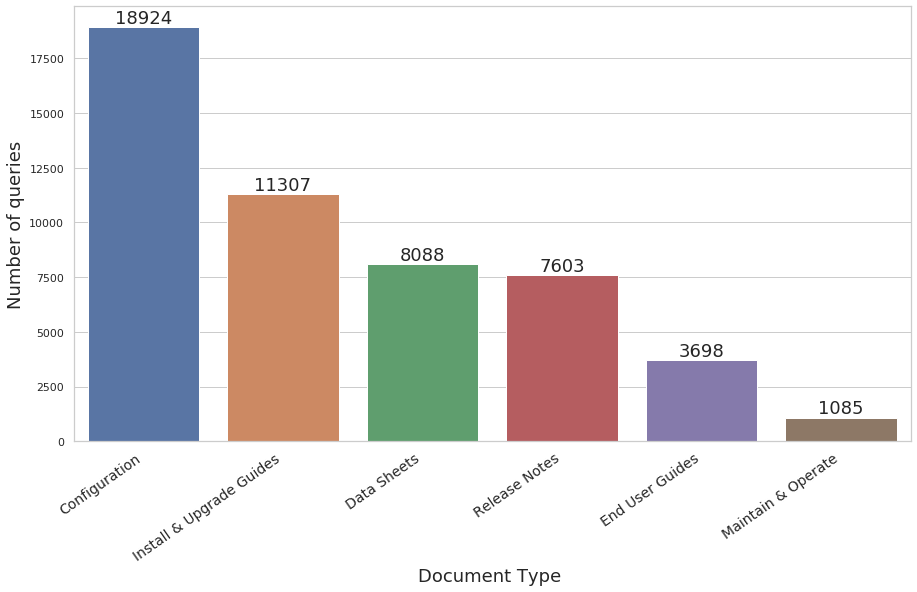

In [57]:
# Load file.
filepath = '/raid/antoloui/Master-thesis/_data/classification/synthetic_query_to_doctype.pkl'
with open(filepath, 'rb') as f:
    data = pickle.load(f)
    
# Create dataframe.
new_df = pd.DataFrame(data, columns =['Query', 'Class'])
new_df = new_df.dropna()

# Print details.
print('Number of training queries: {}\n'.format(new_df.shape[0]))
print('Number of doc types: {:,}'.format(len(new_df.Class.unique())))
for i, cat in enumerate(new_df.Class.unique()):
    print("  {}".format(cat))

# Check for duplicated queries.
print("\nNumber of duplicated rows: {}. Only keeping one sample for each duplicate...".format(new_df[new_df.duplicated()].shape[0]))
new_df.drop_duplicates(subset=['Query', 'Class'], keep='first', inplace=True)
print("Number of duplicated queries with different classes: {}. Remove them...".format(new_df[new_df.duplicated(['Query'])].shape[0]))
new_df.drop_duplicates(subset=['Query'], keep=False, inplace=True)
new_df.reset_index(drop=True, inplace=True)
print("Final number of queries: {}".format(new_df.shape[0]))

# Rename long class names.
new_df = new_df.replace({'Class': {'Configuration (Guides, Examples & TechNotes)': 'Configuration', 
                                   'Maintain & Operate (Guides & TechNotes)': 'Maintain & Operate'}
                        })

# Reset index.
new_df.reset_index(drop=True, inplace=True)

# Plot repartition.
plot_repartition(new_df, "classification_synthetised_doctype_repartition")

### Concat datasets

Number of training queries: 99152

Number of doc types: 7
  Install & Upgrade Guides
  Configuration
  Data Sheets
  Release Notes
  Maintain & Operate
  End User Guides
  Command References


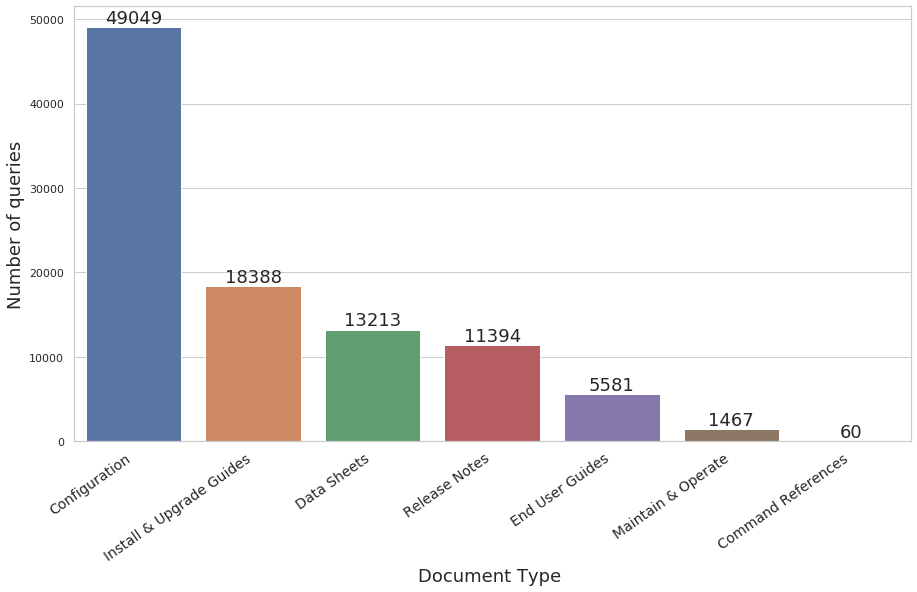

,Query,Class
0,UCS: Virtual drive system mismatch. Reason: S...,Install & Upgrade Guides
1,15.2(6)E2 2960X MIB,Configuration
2,3650 sfp installation video,Install & Upgrade Guides
3,3850 SWITCH CONNECTOR PLUG,Data Sheets
4,3850 wan macsec,Configuration
...,...,...
99147,Cisco Aironet tech downlink mobile,Data Sheets
99148,Connected Grid Switches new Features Cisco IOS...,Release Notes
99149,Grid Switches Cisco Release 2,Release Notes
99150,Connected Grid switch new Features Cisco IOS R...,Release Notes


In [59]:
# Concat dataframes.
concat_df = pd.concat([original_df,new_df], ignore_index=True)

# Print details.
print('Number of training queries: {}\n'.format(concat_df.shape[0]))
print('Number of doc types: {:,}'.format(len(concat_df.Class.unique())))
for i, cat in enumerate(concat_df.Class.unique()):
    print("  {}".format(cat))

# Plot repartition.
plot_repartition(concat_df, "classification_combined_doctype_repartition")

concat_df

### Get balanced dataset

Number of training queries: 9415

Number of doc types: 5
  Configuration
  Install & Upgrade Guides
  Data Sheets
  Release Notes
  End User Guides


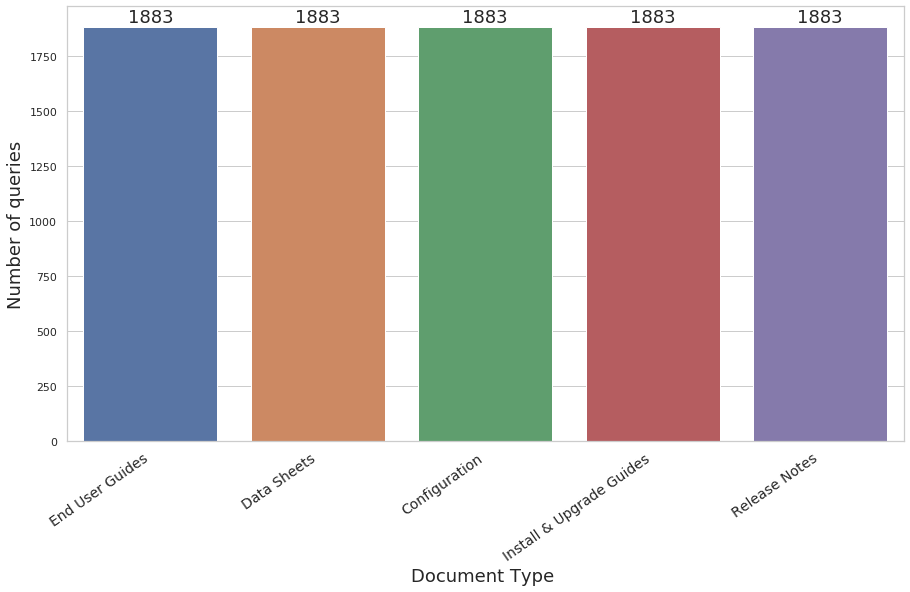

In [61]:
# Get the maximum number of samples of the smaller class. 
# Note that the classes with under 1500 samples are not taken into account.
count = original_df['Class'].value_counts()
count = count[count > 1500]
nb_samples = min(count)

# Randomly select 'nb_samples' for all classes.
balanced_df = pd.DataFrame(columns=['Query', 'Class'])
for i, cat in enumerate(count.index.tolist()):
    tmp_df = original_df[original_df['Class']==cat].sample(n=nb_samples, replace=False, random_state=2)
    balanced_df = pd.concat([balanced_df,tmp_df], ignore_index=True)

# Print details.
print('Number of training queries: {}\n'.format(balanced_df.shape[0]))
print('Number of doc types: {:,}'.format(len(balanced_df.Class.unique())))
for i, cat in enumerate(balanced_df.Class.unique()):
    print("  {}".format(cat))

# Plot repartition.
plot_repartition(balanced_df, "classification_balanced_doctype_repartition")

## Wordclouds

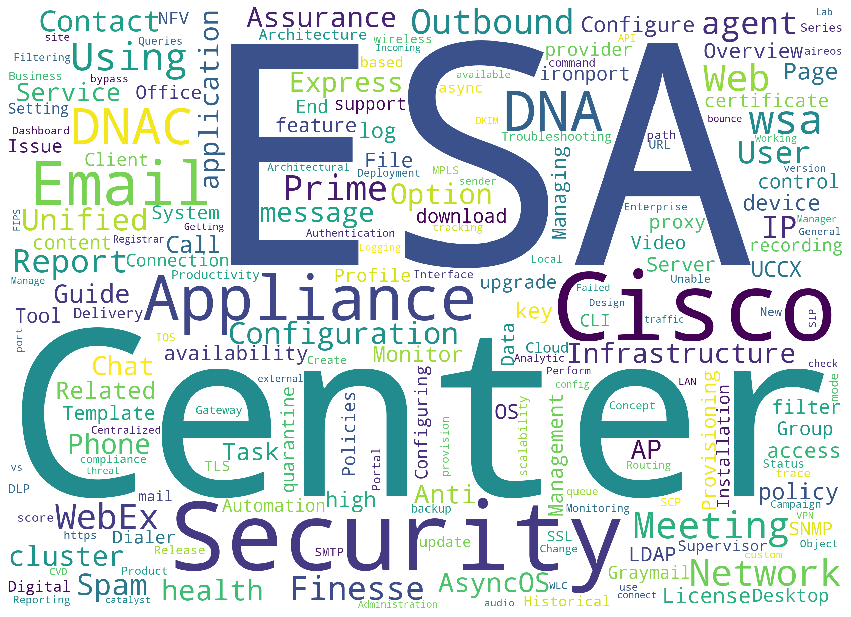

In [68]:
def draw_wordcloud(df, class_name, fig_name):
    """
    """
    # Get all queries from the class.
    subset = df[df.Class==class_name]
    text = subset.Query.values

    # Create Wordcloud.
    cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=2500,
                      height=1800
                      ).generate(" ".join(text))

    # Save and show figure.
    plt.figure(figsize=(15,15))
    plt.axis('off')
    cloud.to_file("./figures/" + fig_name + ".pdf")
    plt.imshow(cloud)
    
    
draw_wordcloud(original_df, 'End User Guides', "worcloud_end_user_guides")

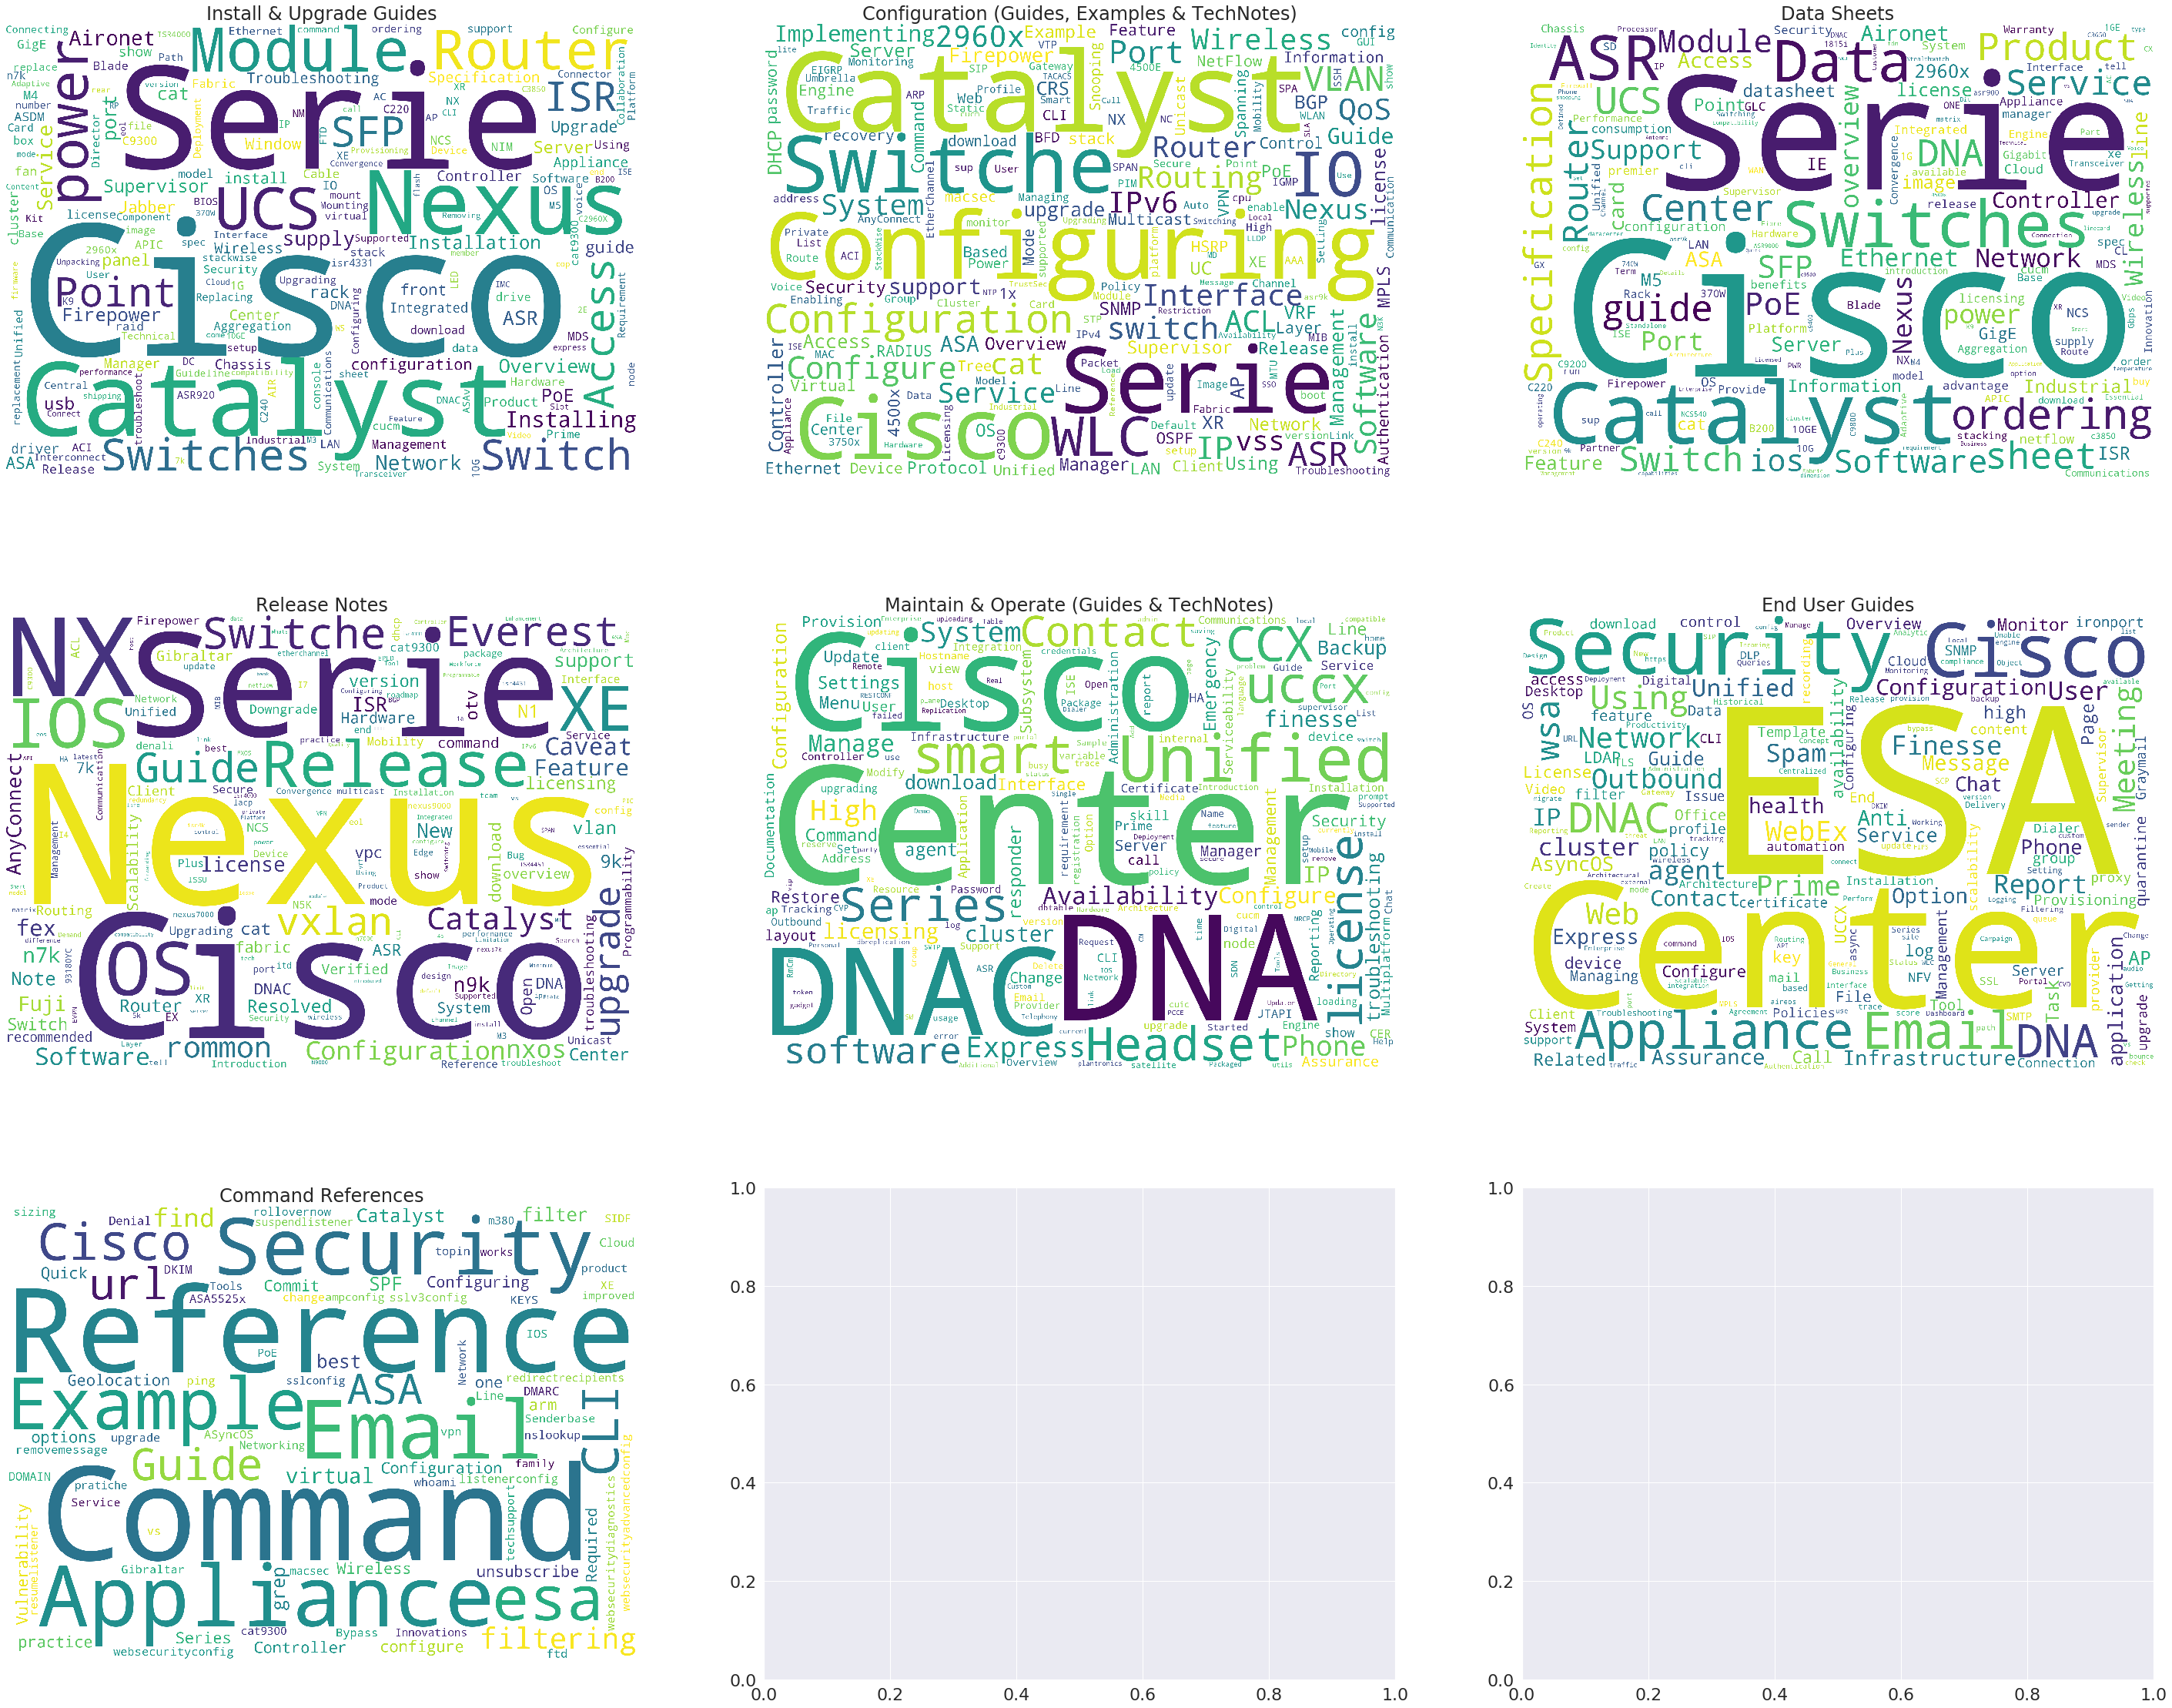

In [81]:
# Init figure.
height = 3
width = 3
fig, axarr = plt.subplots(height, width, figsize=(50,40))


# Draw plots.
for i, cat in enumerate(original_df.Class.unique()):
    
    # Get all queries from the category
    subset = original_df[original_df.Class==cat]
    text = subset.Query.values
    
    # Create Wordcloud.
    cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=2500,
                      height=1800
                      ).generate(" ".join(text))
    
    # Add subplot.
    if i%width==0:
        idx = i+1
    else:
        idx = i
    axarr[int(np.ceil(idx/width))-1, i%width].imshow(cloud)
    axarr[int(np.ceil(idx/width))-1, i%width].set_title(cat)
    axarr[int(np.ceil(idx/width))-1, i%width].axis('off')
    
plt.show()